In [2]:

# LOGISTIC REGRESSION PROJECT
# Diabetes Prediction Based on BMI


# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 2: Load Dataset
df = pd.read_csv("BMI_dataset.csv")

print("===== DATASET =====")
print(df)

print("\n===== DATA INFO =====")
print(df.info())

print("\n===== MISSING VALUES =====")
print(df.isnull().sum())

===== DATASET =====
   BMI  Diabetes
0   18         0
1   20         0
2   22         0
3   25         0
4   28         1
5   30         1
6   32         1
7   35         1
8   38         1
9   40         1

===== DATA INFO =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   BMI       10 non-null     int64
 1   Diabetes  10 non-null     int64
dtypes: int64(2)
memory usage: 292.0 bytes
None

===== MISSING VALUES =====
BMI         0
Diabetes    0
dtype: int64


In [3]:
# Step 3: Prepare Data


X = df[["BMI"]]
y = df["Diabetes"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


# Step 4: Train Logistic Regression Model


model = LogisticRegression()
model.fit(X_train, y_train)


# Step 5: Evaluate Model


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("\nModel Accuracy:", accuracy)




Model Accuracy: 1.0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


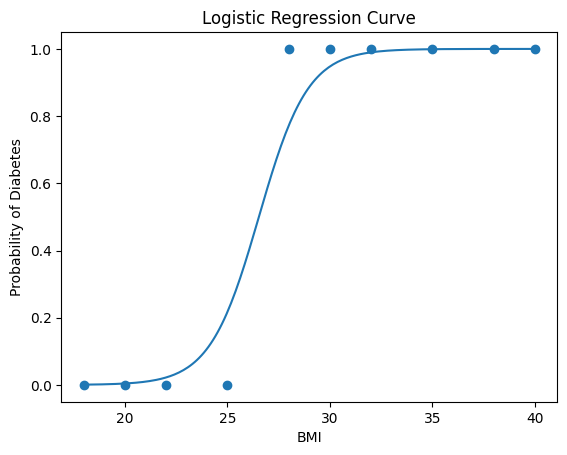


BMI where probability crosses 50%: 26.540172807470086


In [4]:

# Step 6: Plot Logistic Curve


bmi_range = np.linspace(df["BMI"].min(), df["BMI"].max(), 200).reshape(-1,1)
probabilities = model.predict_proba(bmi_range)[:,1]

plt.figure()
plt.scatter(df["BMI"], df["Diabetes"])
plt.plot(bmi_range, probabilities)
plt.xlabel("BMI")
plt.ylabel("Probability of Diabetes")
plt.title("Logistic Regression Curve")
plt.show()


# Step 7: Find BMI where Probability = 50%


b0 = model.intercept_[0]
b1 = model.coef_[0][0]

# At probability = 0.5 → b0 + b1*x = 0
bmi_50 = -b0 / b1

print("\nBMI where probability crosses 50%:", bmi_50)